In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.utils import load_and_regularize_covariance_matrices, calculate_covariance_means, project_to_tangent_and_triu, evaluate_metrics_repeatedly, reduce_spd_dataset
from src.covariance_means import generalized_eigenvalue_covariance_mean

from pyriemann.utils.viz import plot_cov_ellipse
from mpl_toolkits.mplot3d import Axes3D

%load_ext autoreload
%autoreload 2

In [2]:

def plot_array_grid(array):    
    N, M, H, _ = array.shape
    
    fig, axes = plt.subplots(N, M, figsize=(M * 1.5, N * 1.5))
    for i in range(N):
        for j in range(M):              
            axes[i, j].imshow(array[i, j], cmap='coolwarm')  
            axes[i, j].axis('off')  
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()
    
def plot_covariance_grid(cov_array, n_std=2.5, **ellipse_kwargs):
    N, M, _, _ = cov_array.shape      
    fig, axes = plt.subplots(N, M, figsize=(M * 3, N * 3)) 

    if N == 1:
        axes = [axes]
    if M == 1:
        axes = [[ax] for ax in axes]
    
    
    for i in range(N):
        for j in range(M):
            ax = axes[i][j] 
            cov_matrix = cov_array[i, j] 

            plot_cov_ellipse(ax, cov_matrix, n_std=n_std, **ellipse_kwargs)
            ax.set_title(f'COV. {i+1},{j+1}')  
            ax.axis('equal')  # Ensure equal scaling
            
    # Adjust layout
    plt.tight_layout()
    plt.show()    

def plot_covariance_vectors(ax, cov_array, **scatter_kwargs):
    N, M, _, _ = cov_array.shape  
    
    # Prepare arrays to hold the extracted components
    X = np.zeros((N, M))
    Y = np.zeros((N, M))
    Z = np.zeros((N, M))
    
    # Loop through the N x M grid
    for i in range(N):
        for j in range(M):
            cov_matrix = cov_array[i, j]
            
            # Extract components from the covariance matrix
            X[i, j] = cov_matrix[0, 0]  # Component (1,1)
            Y[i, j] = cov_matrix[0, 1]  # Component (1,2)
            Z[i, j] = cov_matrix[1, 1]  # Component (2,1)
            
            # Plot each vector as a point in 3D space with passed style configurations
            ax.scatter(X[i, j], Y[i, j], Z[i, j], **scatter_kwargs)
    
    return ax

def plot_surface(ax, xlim, ylim):    
    X = np.linspace(xlim[0], xlim[1], 100)
    Y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(X, Y)
    
    Z = np.divide(np.power(Y, 2), X, out=np.zeros_like(X), where=X!=0)
    
    # Plot the surface
    ax.plot_surface(X, Y, Z, color='gray', alpha=0.5, rstride=100, cstride=100)

In [3]:
c_dataset = load_and_regularize_covariance_matrices(deep_features_type='covs_DN20', group_type='CG')
c_dataset_covs_raw = calculate_covariance_means(c_dataset) 
c_dataset_covs = reduce_spd_dataset(c_dataset_covs_raw, 3)
c_dataset_vectors = project_to_tangent_and_triu(c_dataset_covs)
c_dataset_covs_raw = np.array(c_dataset_covs_raw)
c_dataset_covs = np.array(c_dataset_covs)


pk_dataset = load_and_regularize_covariance_matrices(deep_features_type='covs_DN20', group_type='PG')
pk_dataset_covs_raw = calculate_covariance_means(pk_dataset)
pk_dataset_covs = reduce_spd_dataset(pk_dataset_covs_raw, 3)
pk_dataset_vectors = project_to_tangent_and_triu(pk_dataset_covs)
pk_dataset_covs_raw = np.array(pk_dataset_covs_raw)
pk_dataset_covs = np.array(pk_dataset_covs)


Patients [Tangent space]: 100%|██████████| 11/11 [00:00<00:00, 86.87it/s]


COVARIANCES OF C DATASET


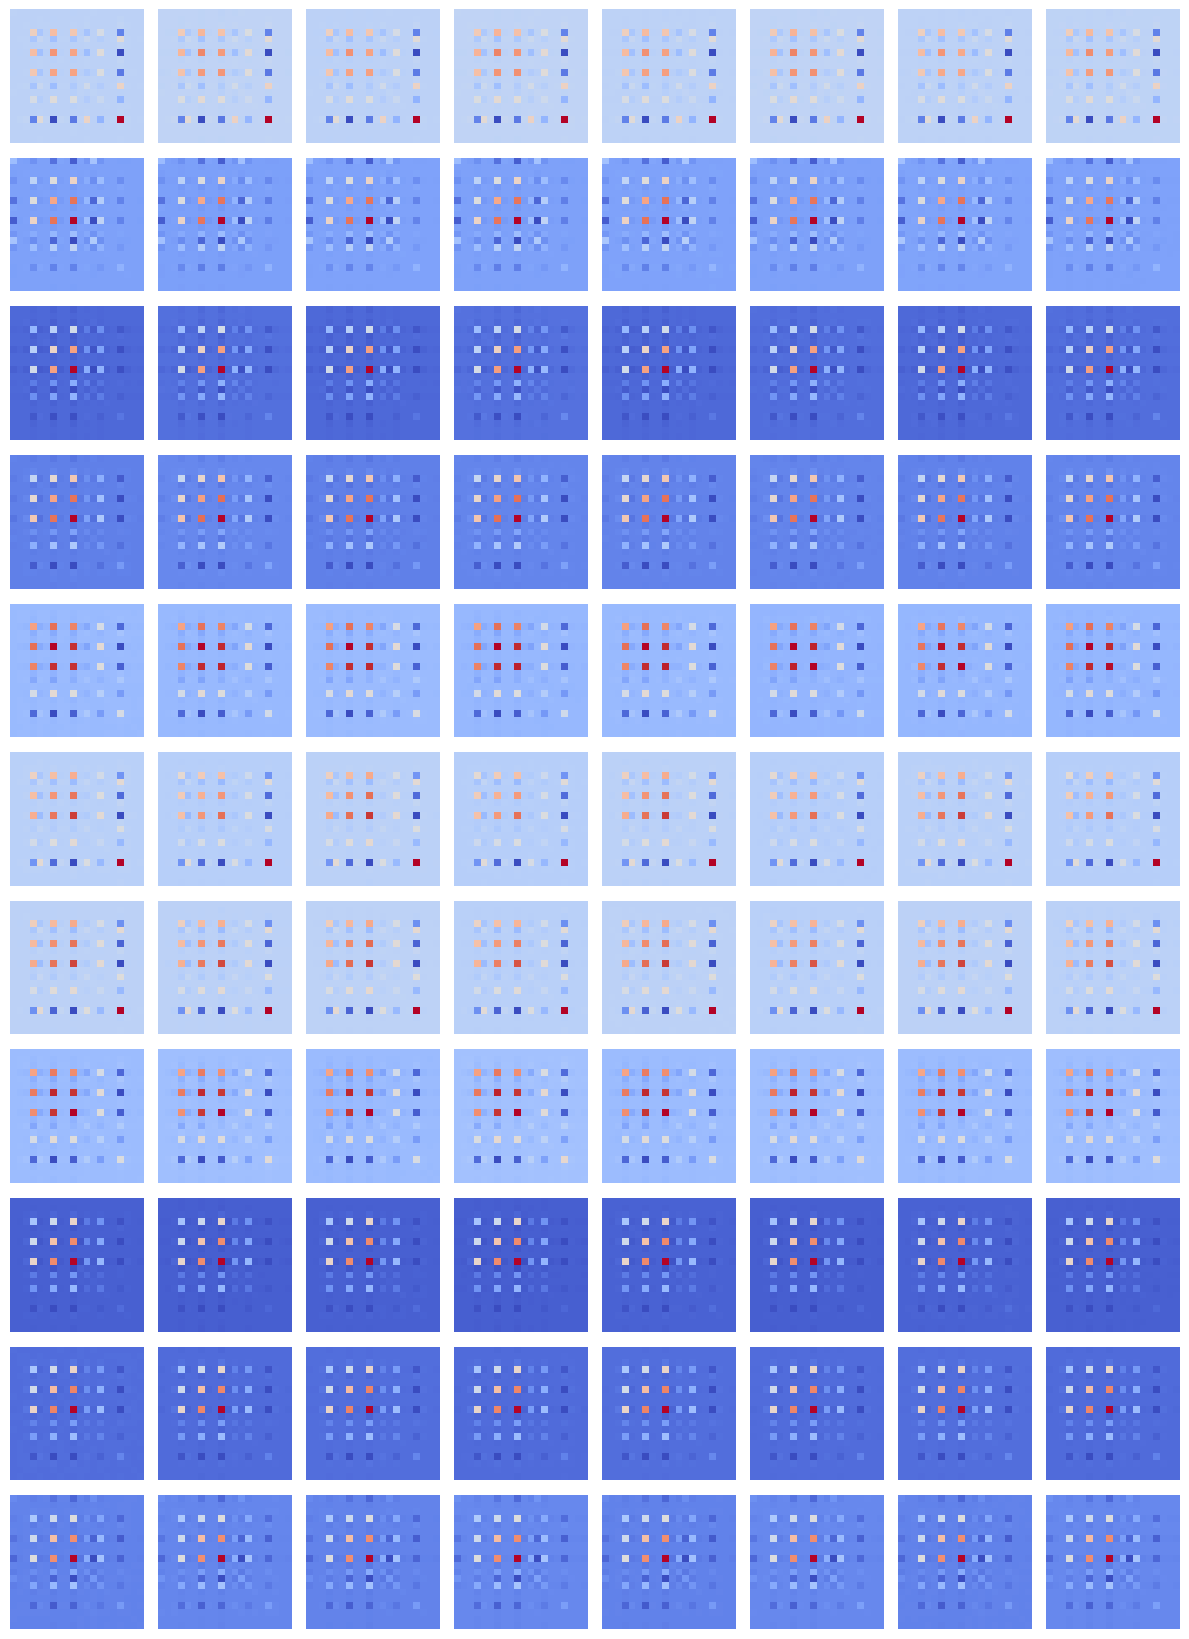

COVARIANCES OF PK DATASET


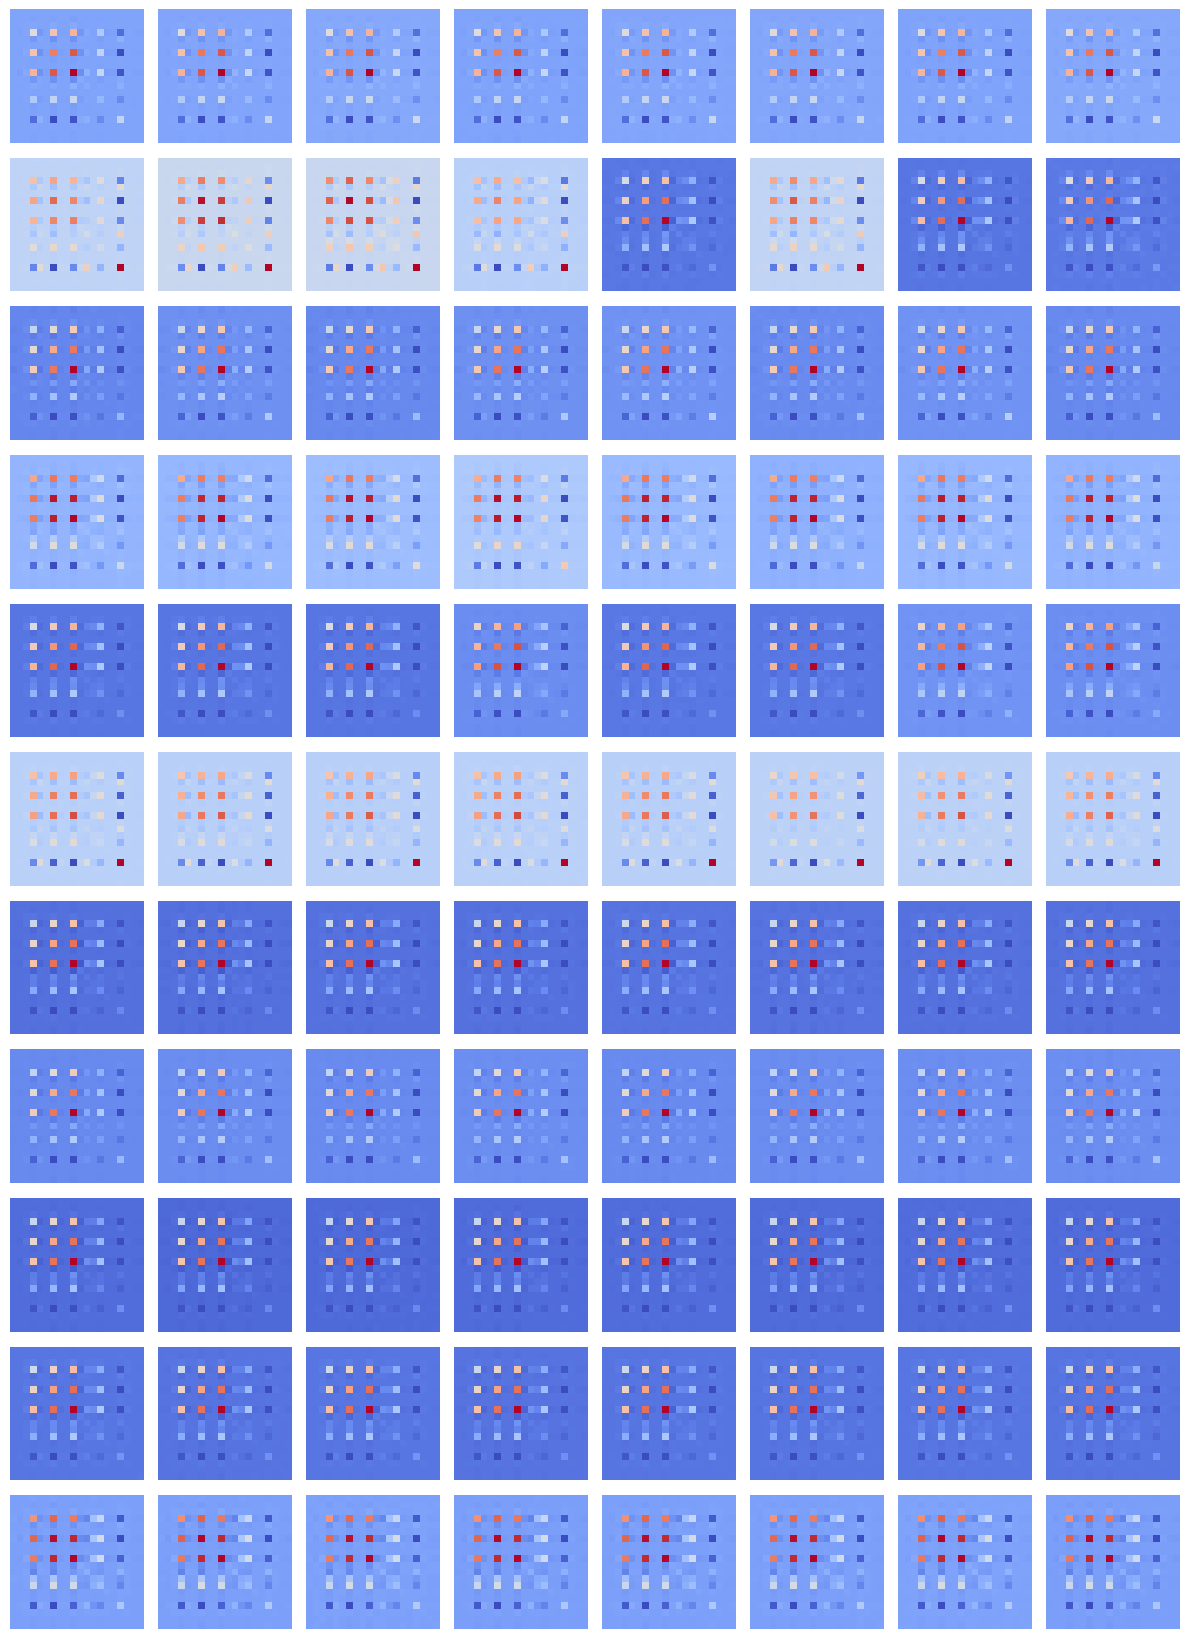

COVARAINCES WITH SPATIAL C DATASET


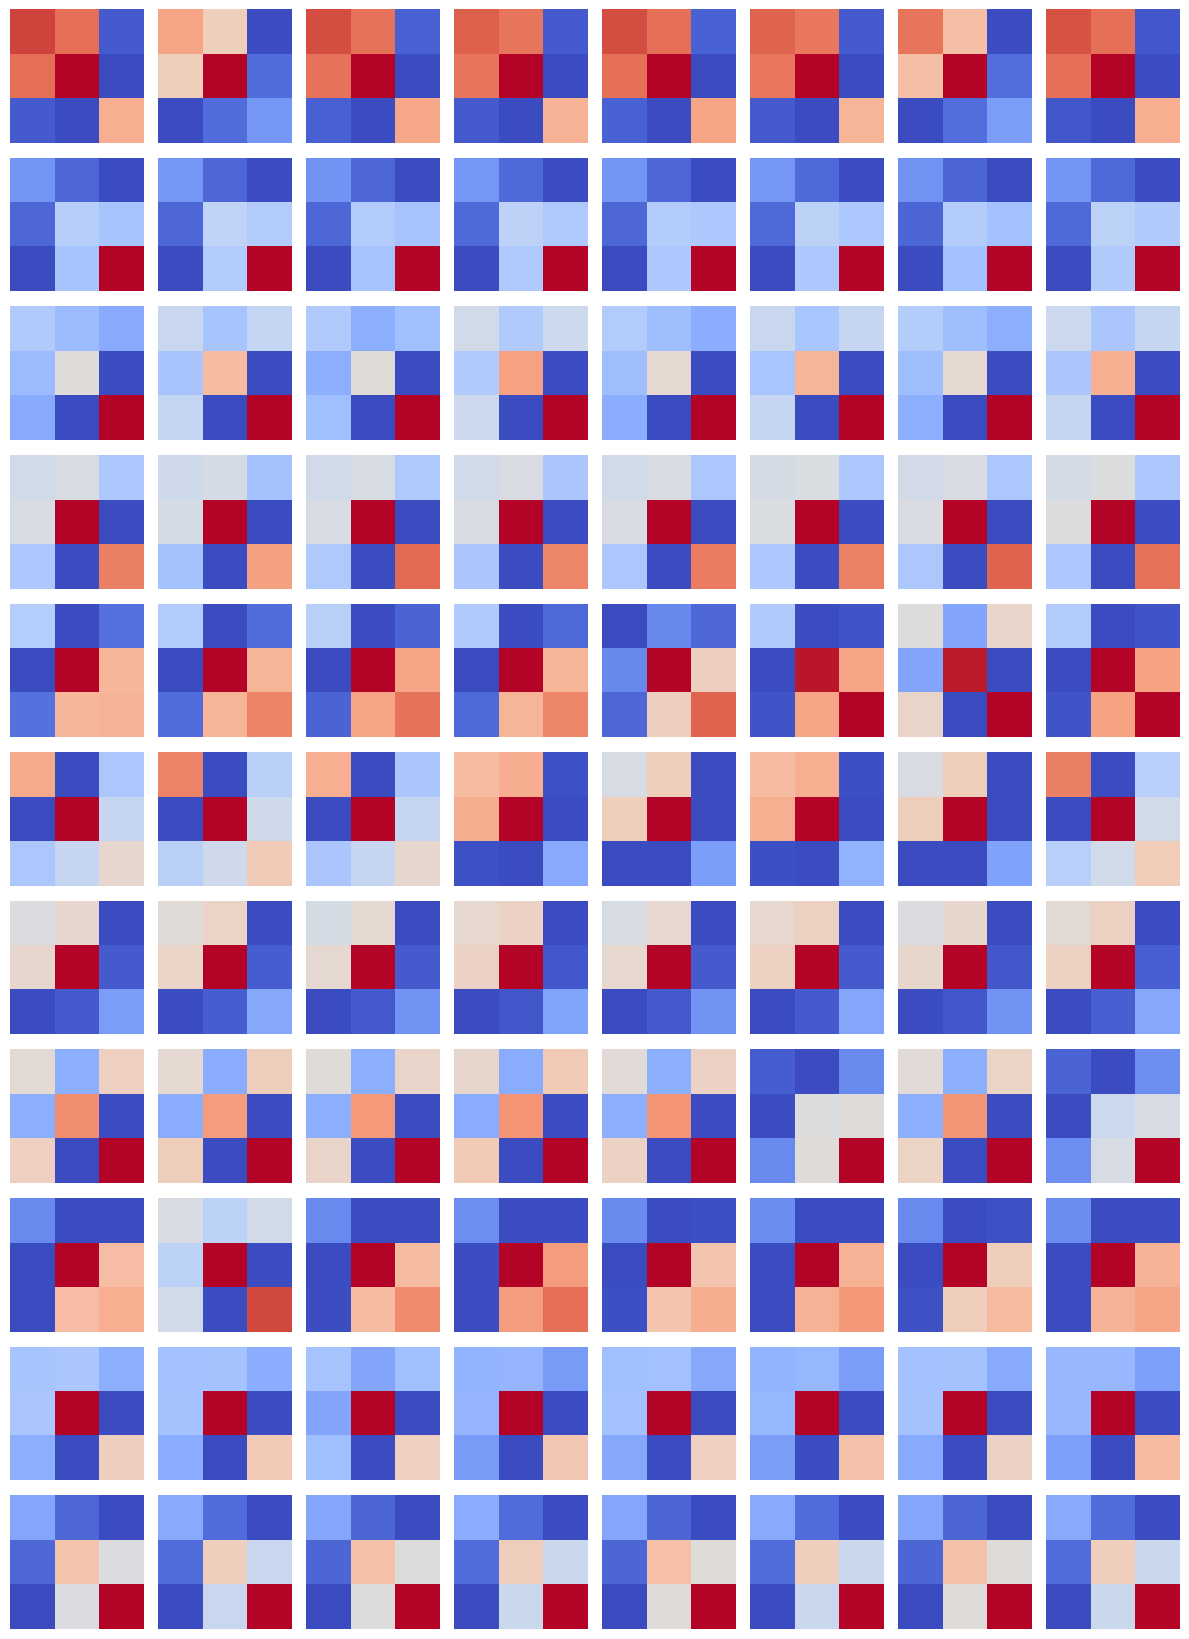

COVARAINCES WITH SPATIAL PK DATASET


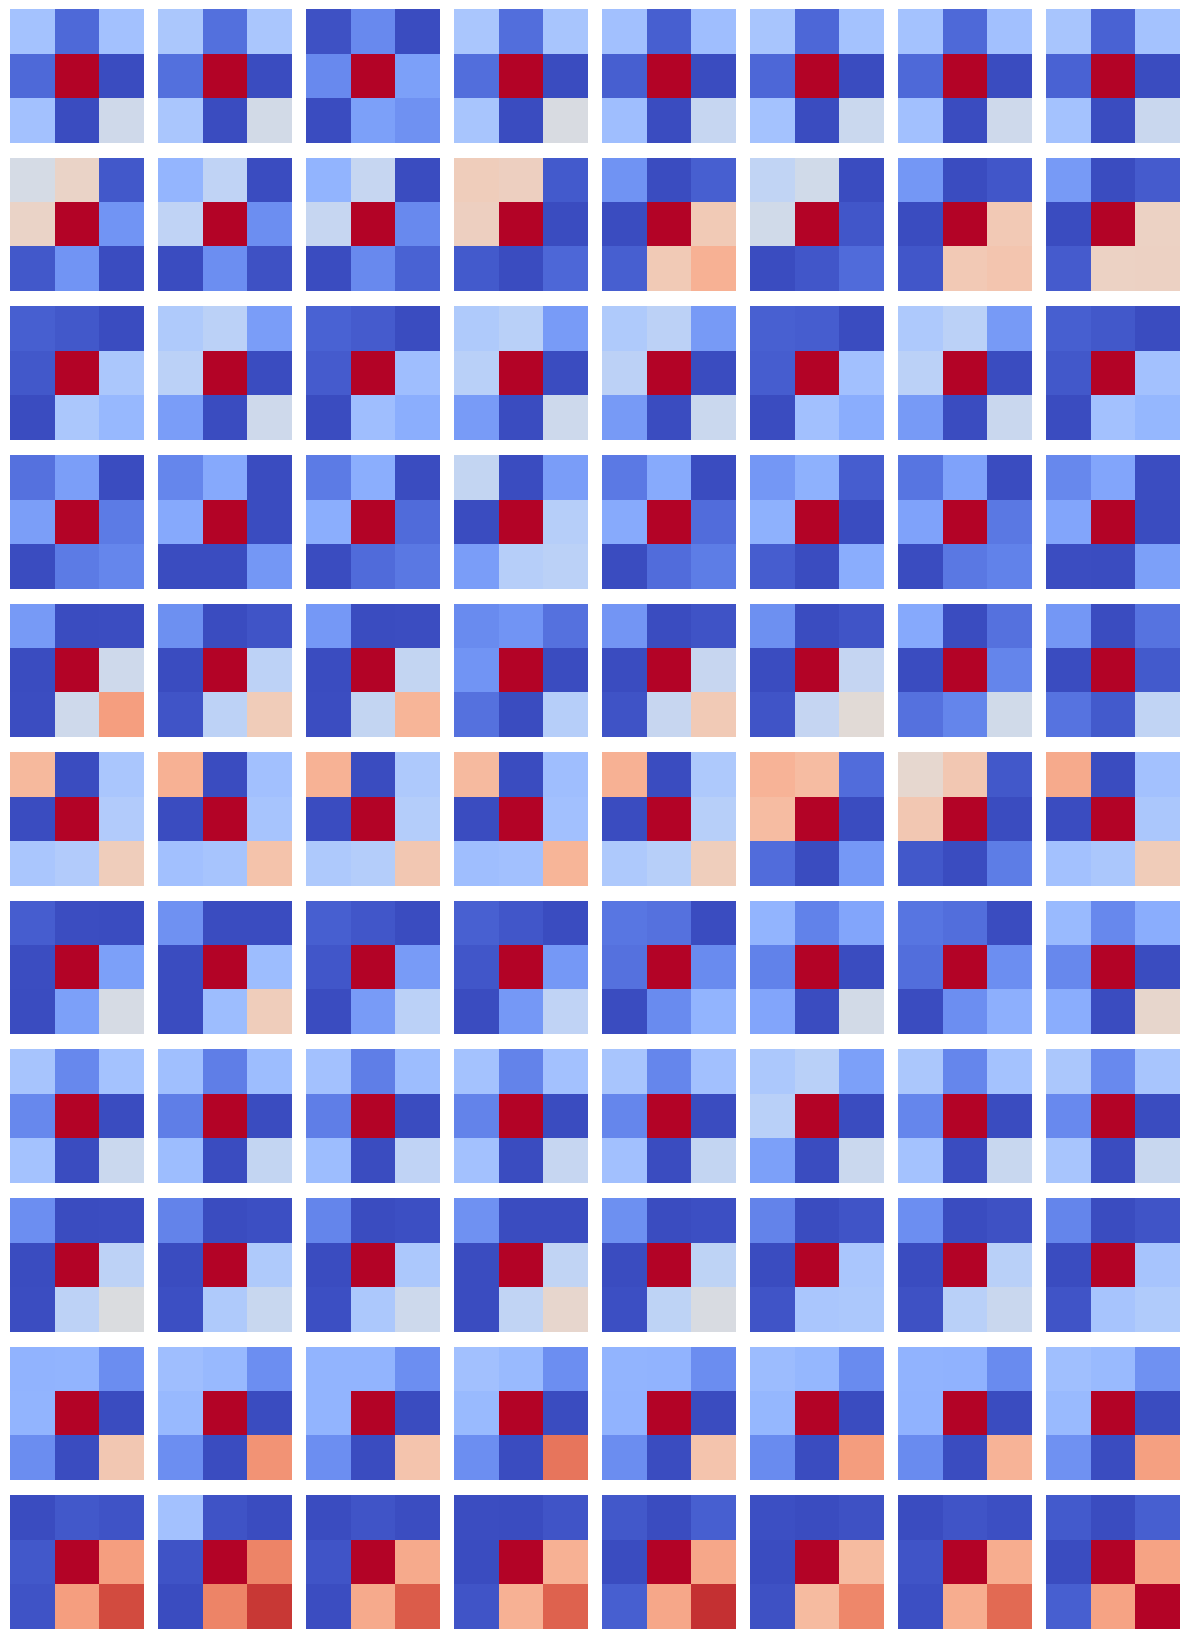

In [4]:
print('COVARIANCES OF C DATASET')
plot_array_grid(c_dataset_covs_raw)

print('COVARIANCES OF PK DATASET')
plot_array_grid(pk_dataset_covs_raw)

print('COVARAINCES WITH SPATIAL C DATASET')
plot_array_grid(c_dataset_covs)

print('COVARAINCES WITH SPATIAL PK DATASET')
plot_array_grid(pk_dataset_covs)

In [5]:
c_dataset_covs_2dim = reduce_spd_dataset(c_dataset_covs_raw, 2)
c_dataset_covs_2dim = np.array(c_dataset_covs_2dim)

pk_dataset_covs_2dim = reduce_spd_dataset(pk_dataset_covs_raw, 2)
pk_dataset_covs_2dim = np.array(pk_dataset_covs_2dim)

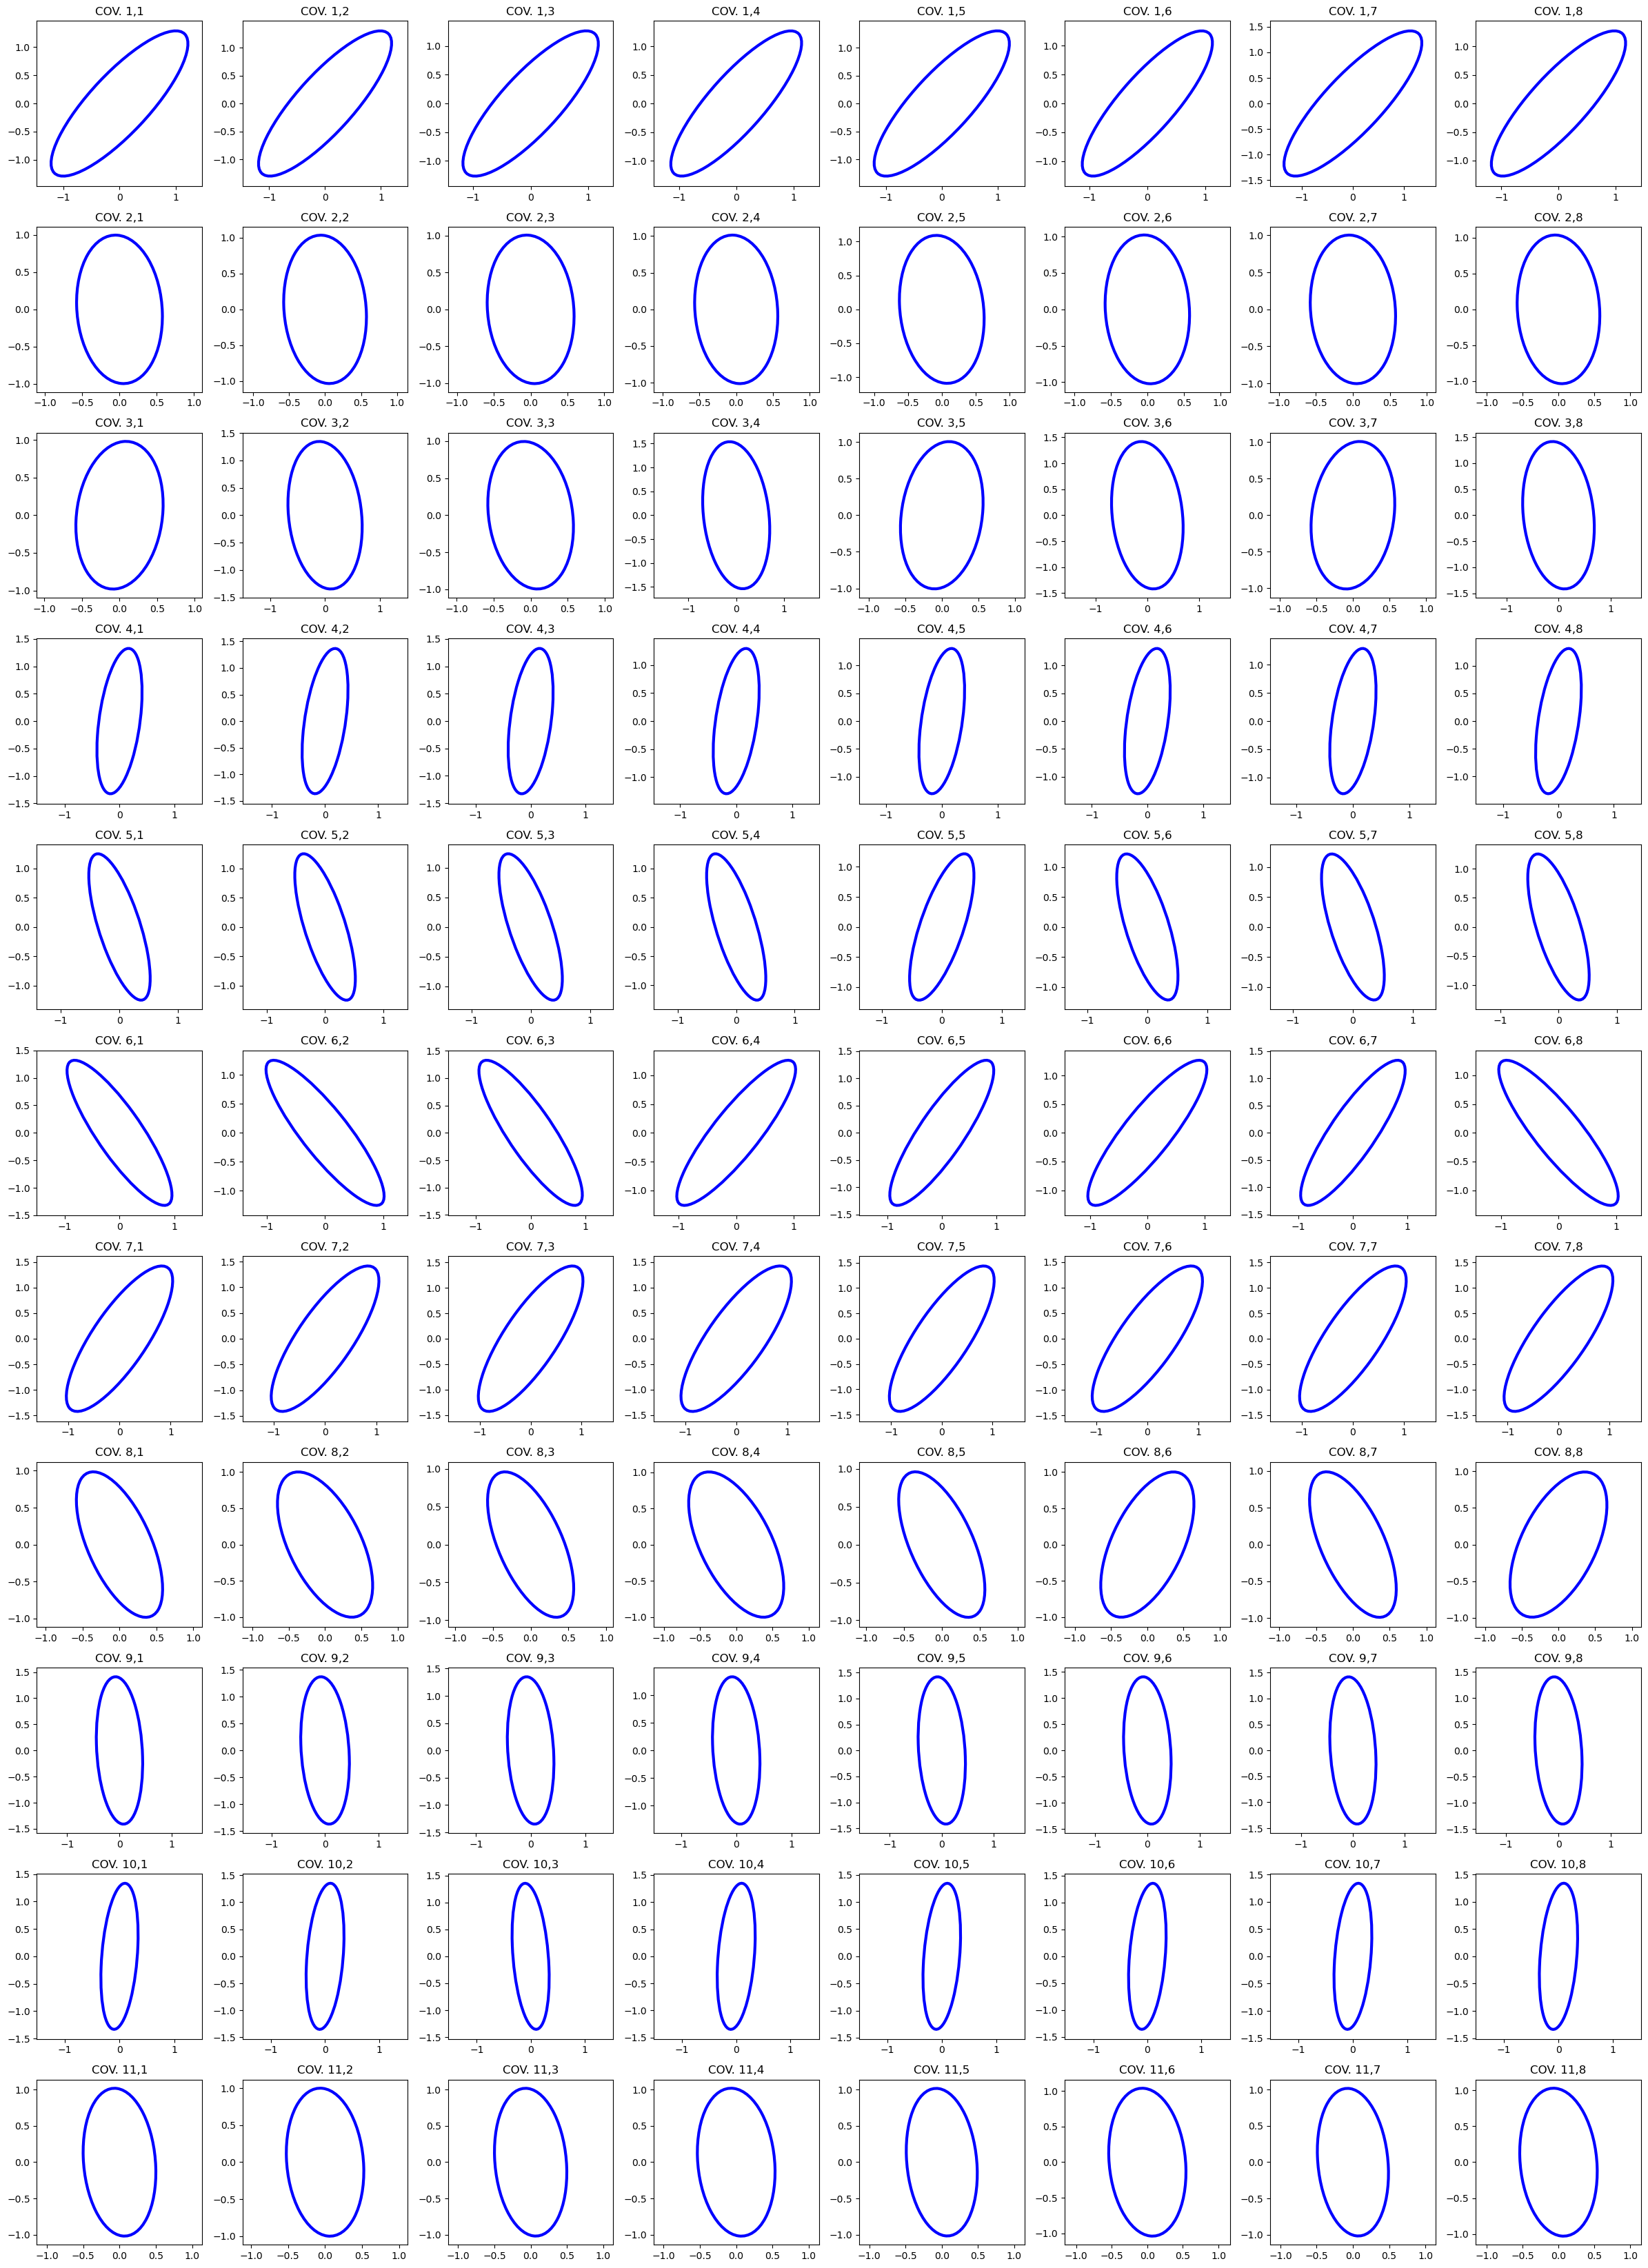

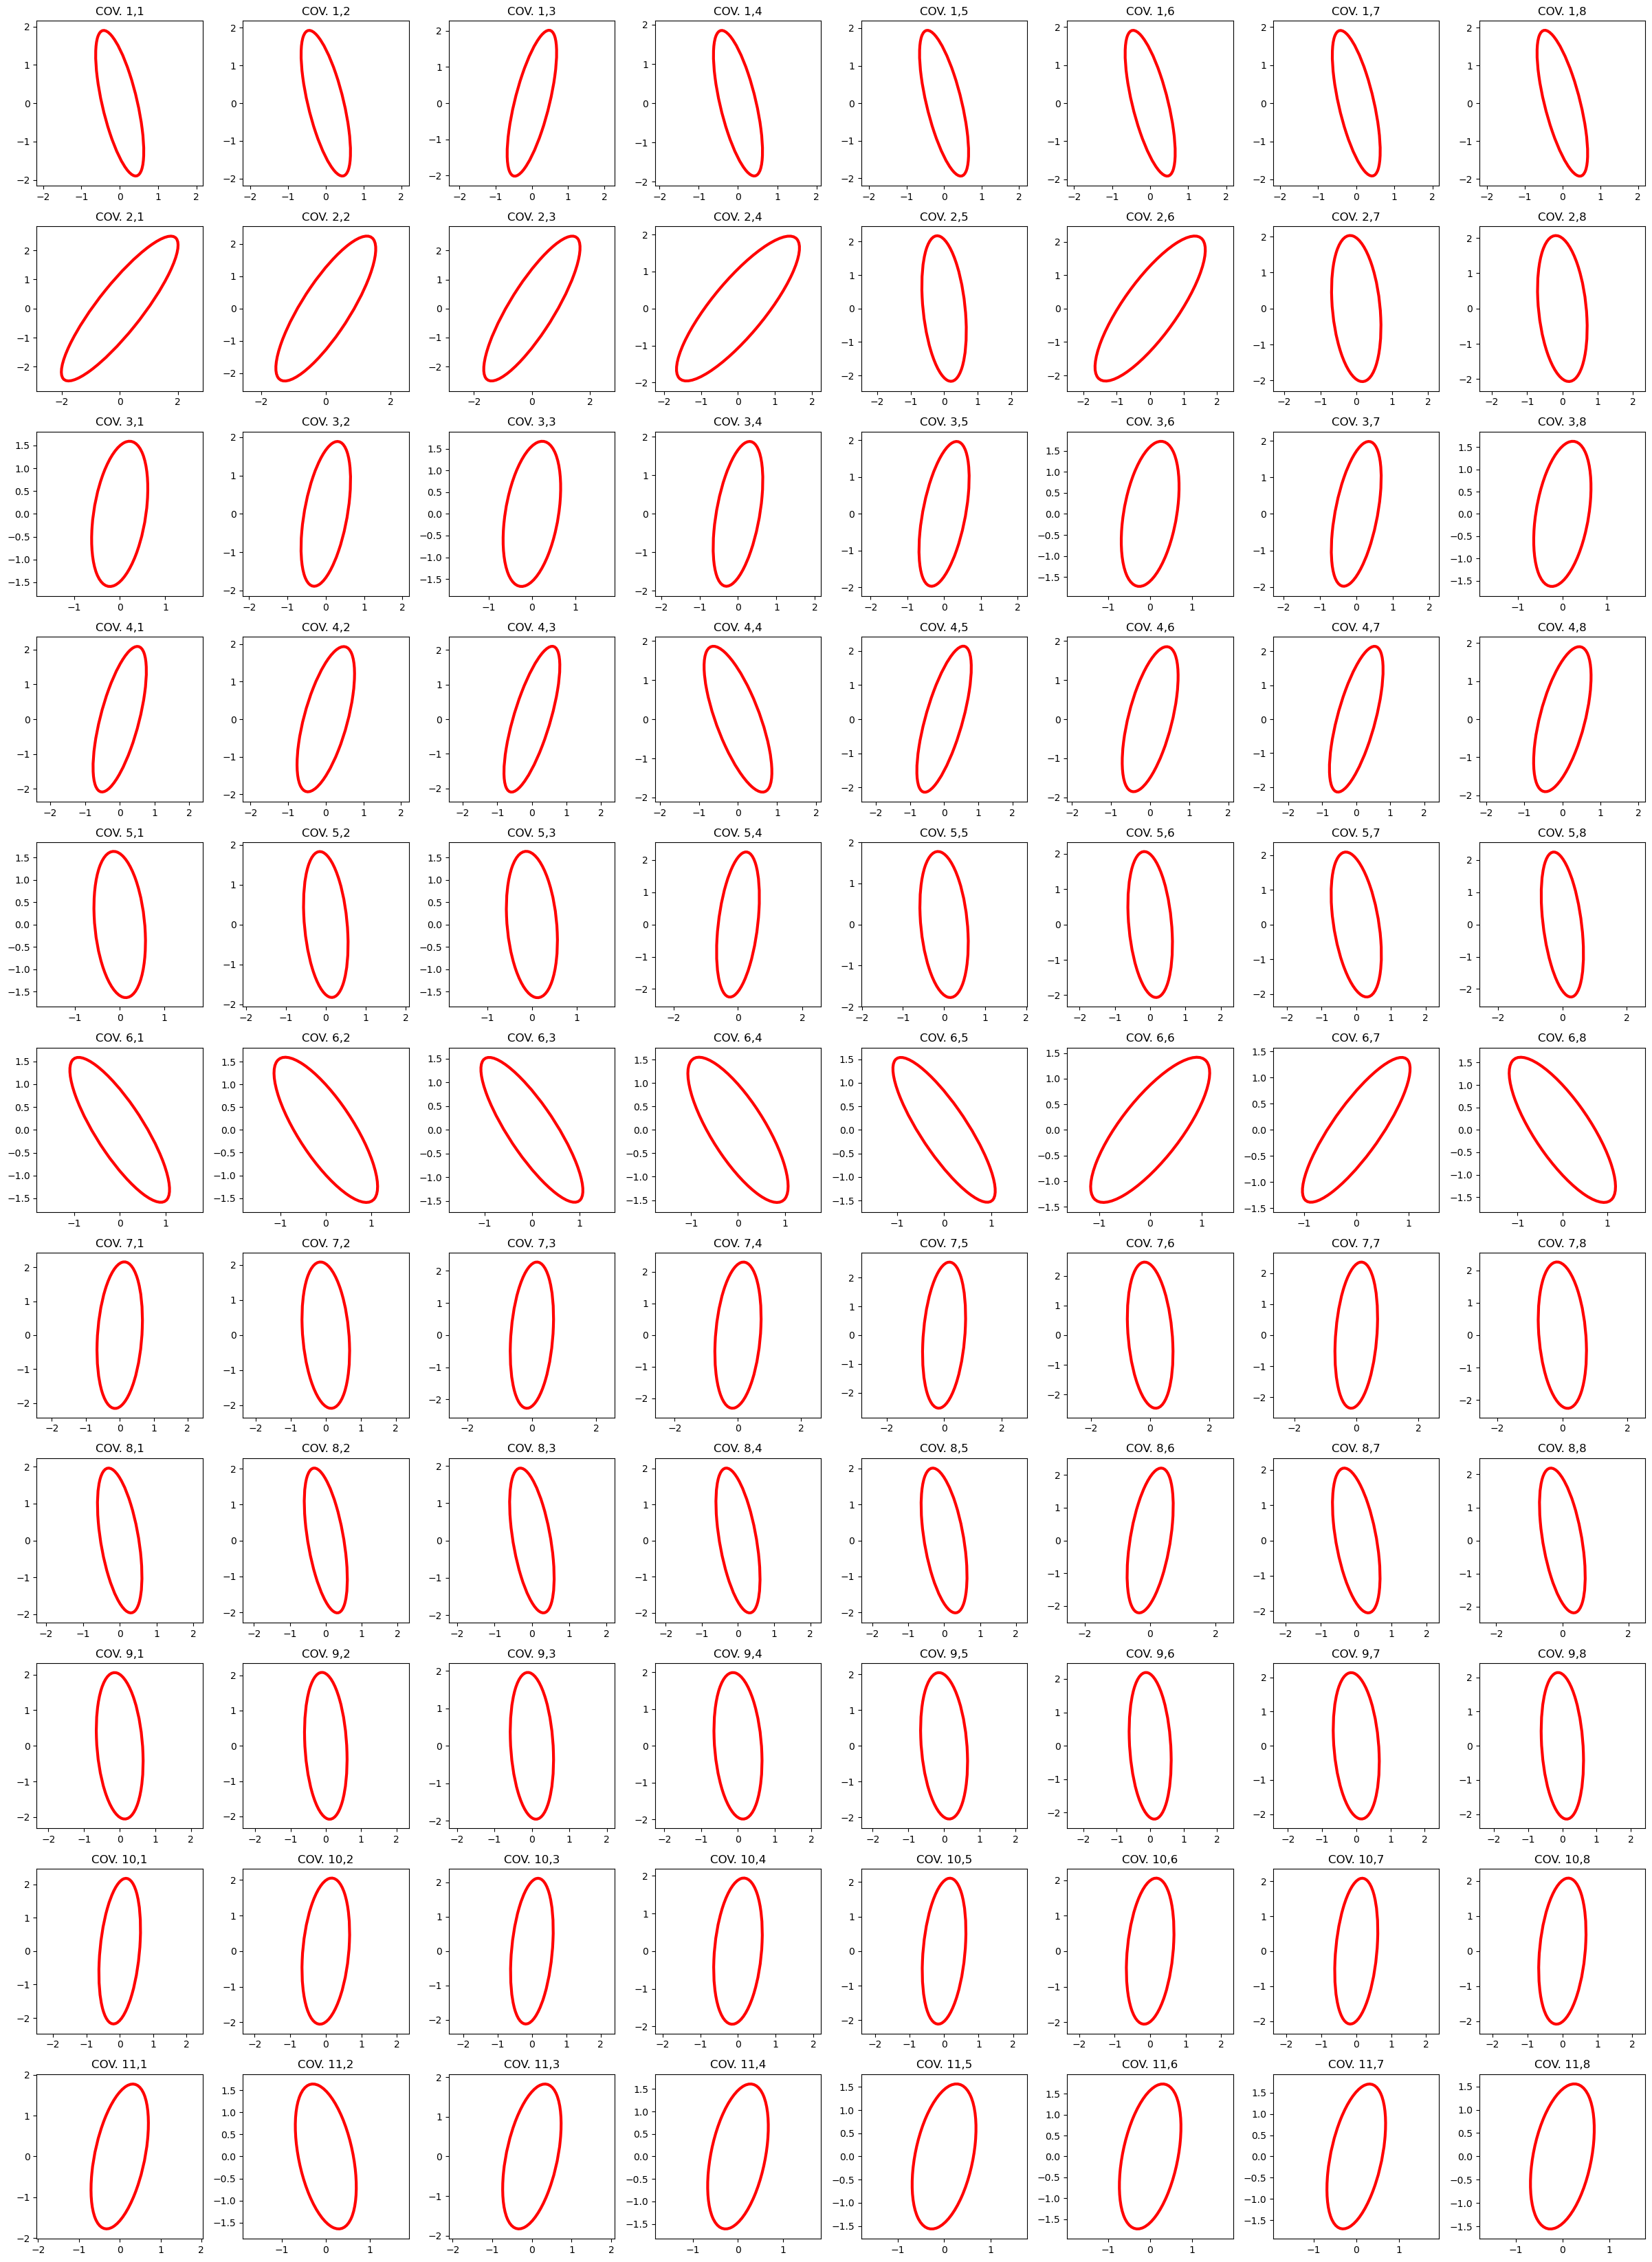

In [6]:
plot_covariance_grid(c_dataset_covs_2dim, edgecolor='blue', linewidth=3)
plot_covariance_grid(pk_dataset_covs_2dim, edgecolor='red', linewidth=3)

In [7]:
# np.max(c_dataset_covs_2dim)
min_x, max_x = np.min(c_dataset_covs_2dim[:,:,0,0]), np.max(c_dataset_covs_2dim[:,:,0,0])
min_y, max_y = np.min(c_dataset_covs_2dim[:,:,0,1]), np.max(c_dataset_covs_2dim[:,:,0,1])

In [8]:
# Check the determinant of the covariance matrices
det = c_dataset_covs_2dim[:,:,0,0] * c_dataset_covs_2dim[:,:,1,1] - c_dataset_covs_2dim[:,:,0,1] * c_dataset_covs_2dim[:,:,1,0]
np.min(det)

0.004758672691197424

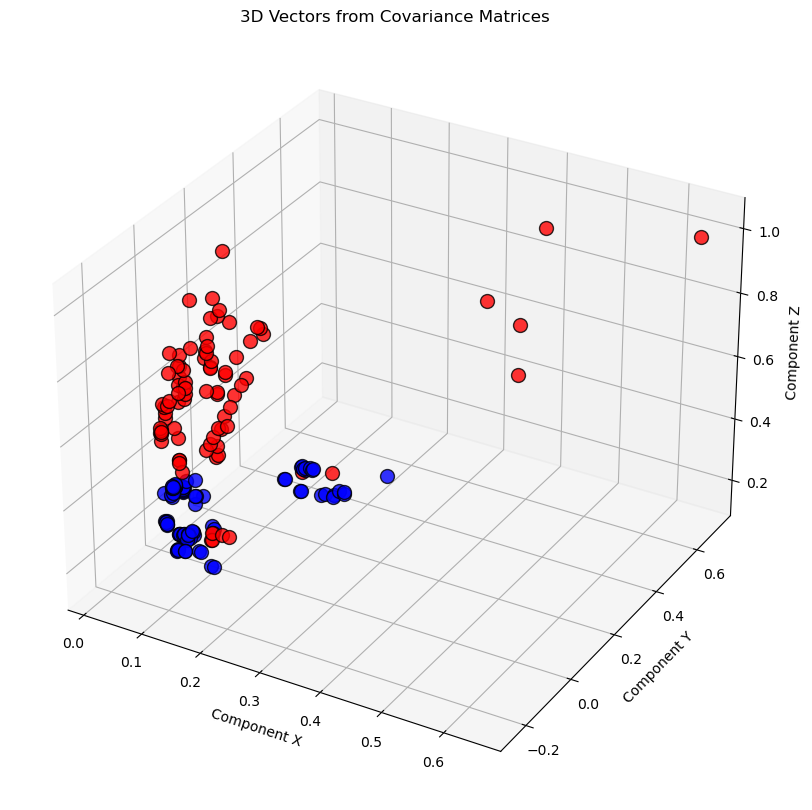

In [9]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the first dataset
plot_covariance_vectors(ax, 
                        c_dataset_covs_2dim, 
                        c='blue', marker='o', s=100, edgecolors='black', alpha=0.8)

# Plot the second dataset
plot_covariance_vectors(ax, 
                        pk_dataset_covs_2dim, 
                        c='red', marker='o', s=100, edgecolors='black', alpha=0.8)

# plot_surface(ax, xlim=(0.1, 0.8), ylim=(0.1, 0.8))


ax.set_xlabel('Component X')
ax.set_ylabel('Component Y')
ax.set_zlabel('Component Z')

# Set the title
ax.set_title('3D Vectors from Covariance Matrices')

# Show the plot
plt.show()